<a href="https://colab.research.google.com/github/MohdIstiaqHossainJunaid/Bangla-Food-Review-Sentimental-Analysis-using-Machine-Learning/blob/main/(Word_to_Sequence_)CSE498R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A Sentiment Analysis Model of Food Reviews in Bengali Texts Based on Deep Learning techniques.**

Supervisor- **Afn1**



**Memebers:**

1.   Mohd. Istiaq Hossain Junaid,1821577642
2.   Faisal Hossain
3.   Udayan shah Upal
4.   Anjana tameem(Unofficial)





#**Preprocessing**


**Step 01 - Punctuation Removal**
**Step 02 -**

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random

import string 
import cufflinks as cf
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from numpy.random import seed
seed(1)

import tensorflow
tensorflow.random.set_seed(1)

In [94]:
import pandas as pd
import io
df = pd.read_csv("/content/drive/MyDrive/Playing with Data/Food Review - Food Review.csv")
df.head()

,Speech,Label
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1
4,আমি খাইসি খুবই মজার,1


In [95]:
df['Label'].value_counts()

1    520
0    520
Name: Label, dtype: int64

In [96]:
df.duplicated().sum()

0

# Data Pre-Processing



*   Punctuation Removal
*   Tokenization
*   Stopword Removal
*   Stemming
*   Join




In [97]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [98]:
def remove_punctuation(txt):
    punctuation_list = str(string.punctuation) + "।"
    txt_nopunct = "".join([c for c in txt if c not in punctuation_list])
    return txt_nopunct

In [99]:
def remove_garbage(a):
  a= "".join(i for i in a if i in ["।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
  removed=" ".join(a.split())
  return removed

In [100]:
df['Removed Puncutation'] = df['Speech'].apply(lambda x:remove_punctuation(x))
df.head()

,Speech,Label,Removed Puncutation
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার


In [101]:
df['remove Eng'] = df['Removed Puncutation'].apply(lambda x:remove_garbage(x))
df

,Speech,Label,Removed Puncutation,remove Eng
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটানোর...
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার,আমি খাইসি খুবই মজার
...,...,...,...,...
1035,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,1,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে
1036,সবসময়ই অসাধারণ রান্না ভাই।😍😍🥰,1,সবসময়ই অসাধারণ রান্না ভাই😍😍🥰,সবসময়ই অসাধারণ রান্না ভাই
1037,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,1,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ্ছে এ...
1038,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,1,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,অসম্ভব সুন্দর বিরানি রেসিপি


**2.Bangla Tokenization and Bangla Stopword Removing**




In [102]:
pip install bnlp_toolkit

In [103]:
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

df['Removed Stopped word'] = df['remove Eng'].apply(lambda x: remove_stopwords(x,stopwords))
df 

,Speech,Label,Removed Puncutation,remove Eng,Removed Stopped word
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটানোর...,"[ব্যাস্ততম, জীবনের, একটু, মনরম, পরিবেশে, সময়, ..."
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,"[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]"
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,"[খাবারের, মান, খারাপ, দামের, তুলনায়, পরিমান, ক..."
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,"[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]"
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার,আমি খাইসি খুবই মজার,"[খাইসি, খুবই, মজার]"
...,...,...,...,...,...
1035,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,1,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে,"[দেখেই, খেয়ে, ফেলতে, ইচ্ছা]"
1036,সবসময়ই অসাধারণ রান্না ভাই।😍😍🥰,1,সবসময়ই অসাধারণ রান্না ভাই😍😍🥰,সবসময়ই অসাধারণ রান্না ভাই,"[সবসময়ই, অসাধারণ, রান্না, ভাই]"
1037,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,1,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ্ছে এ...,"[চিকেন, বিরিয়ানিটা, মজা, একটু, খেয়ে, দেখি]"
1038,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,1,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,অসম্ভব সুন্দর বিরানি রেসিপি,"[অসম্ভব, সুন্দর, বিরানি, রেসিপি]"


**3. Stemming**

In [104]:
pip install bangla-stemmer

In [105]:
from bangla_stemmer.stemmer import stemmer
wordlist = ['কবিরগুলিকে', 'আমাকে', 'নামাবার']
stmr = stemmer.BanglaStemmer()
stm = stmr.stem(wordlist)
print(stm)

applied first rules..
applied third rules..
applied first rules..
applied fourth rules..
['কবির', 'আমা', 'নামা']


In [106]:
from bangla_stemmer.stemmer import stemmer
stmr = stemmer.BanglaStemmer()

In [ ]:
df['stemmed'] = df['Removed Stopped word'].apply(lambda x:stmr.stem(x))

In [108]:
df.head()

,Speech,Label,Removed Puncutation,remove Eng,Removed Stopped word,stemmed
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটানোর...,"[ব্যাস্ততম, জীবনের, একটু, মনরম, পরিবেশে, সময়, ...","[ব্যাস্ততম, জীবন, একটু, মনরম, পরিবেশ, সময়, কাট..."
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,"[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]","[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]"
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,"[খাবারের, মান, খারাপ, দামের, তুলনায়, পরিমান, ক...","[খাবারের, মান, খারাপ, দাম, তুলনায়, পরিমান, কম,..."
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,"[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]","[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]"
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার,আমি খাইসি খুবই মজার,"[খাইসি, খুবই, মজার]","[খাইসি, খুব, মজ]"


**4.Join**

In [109]:
df['sentence']=df['stemmed'].apply(' '.join)
df.head()

,Speech,Label,Removed Puncutation,remove Eng,Removed Stopped word,stemmed,sentence
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটানোর...,"[ব্যাস্ততম, জীবনের, একটু, মনরম, পরিবেশে, সময়, ...","[ব্যাস্ততম, জীবন, একটু, মনরম, পরিবেশ, সময়, কাট...",ব্যাস্ততম জীবন একটু মনরম পরিবেশ সময় কাটানোর ঘু...
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,"[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]","[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]",অসাধারণ পরিবেশ সুন্দর মার্জিত আন্তরিক
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,"[খাবারের, মান, খারাপ, দামের, তুলনায়, পরিমান, ক...","[খাবারের, মান, খারাপ, দাম, তুলনায়, পরিমান, কম,...",খাবারের মান খারাপ দাম তুলনায় পরিমান কম ইফত প্ল...
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,"[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]","[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]",ভালো বহুত খেয়েছি বাসা একটু দূরে
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার,আমি খাইসি খুবই মজার,"[খাইসি, খুবই, মজার]","[খাইসি, খুব, মজ]",খাইসি খুব মজ


# Deep Learning


In [110]:
from sklearn.model_selection import train_test_split
y=df["Label"]
x_train,x_test,y_train,y_test=train_test_split(df['sentence'].values,df['Label'].values,test_size=0.30,stratify=y)

In [111]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab=20000
tokenizer=Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

In [112]:
wordinx=tokenizer.word_index
v=len(wordinx)
print('The size of dataset vocab is:',v)

The size of dataset vocab is: 1817


In [113]:
train_seq =tokenizer.texts_to_sequences(x_train)
test_seq=tokenizer.texts_to_sequences(x_test)
print('training sequence:',train_seq[0])
print('testing sequence:',test_seq[0])

training sequence: [23, 10, 119, 686, 174, 687, 381, 81, 382, 688, 17, 1, 3]
testing sequence: [107, 10, 565, 164]


In [114]:
pad_train =pad_sequences(train_seq)
T=pad_train.shape[1]
print("The length of the trainging sequence is :",pad_train.shape[1])

The length of the trainging sequence is : 63


In [115]:
pad_test =pad_sequences(test_seq,maxlen=T)
print("The length of testing sequence is ",pad_test.shape[1])

The length of testing sequence is  63


**Deep Learning techniques ( Pretrained Model(LSTM, GRU,RNN))**

In [116]:
from tensorflow.keras.layers import Input,Dense,Embedding,LSTM,GlobalMaxPool1D
from tensorflow.keras.models import Model

D=20
M=15
#D=20
#M=15
#this is giving 82.4%

i= Input(shape=(T, ))
x=Embedding(v+1,D)(i)
x=LSTM(M,return_sequences=True)(x)
x=GlobalMaxPool1D()(x)
x=Dense(32,activation='relu')(x)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)

In [117]:
model.compile(optimizer=tf.optimizers.Adam (learning_rate = 0.0001),loss='binary_crossentropy',metrics='accuracy')
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 63)]              0         
                                                                 
 embedding_6 (Embedding)     (None, 63, 20)            36360     
                                                                 
 lstm_2 (LSTM)               (None, 63, 15)            2160      
                                                                 
 global_max_pooling1d_6 (Glo  (None, 15)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_12 (Dense)            (None, 32)                512       
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                           

In [118]:
r=model.fit(pad_train,y_train,validation_data=(pad_test,y_test), epochs=50)

Epoch 1/50
23/23 [==============================] - 3s 51ms/step - loss: 0.6931 - accuracy: 0.5179 - val_loss: 0.6929 - val_accuracy: 0.5801
Epoch 2/50
23/23 [==============================] - 1s 27ms/step - loss: 0.6928 - accuracy: 0.6058 - val_loss: 0.6928 - val_accuracy: 0.6218
Epoch 3/50
23/23 [==============================] - 1s 28ms/step - loss: 0.6926 - accuracy: 0.6484 - val_loss: 0.6926 - val_accuracy: 0.6635
Epoch 4/50
23/23 [==============================] - 1s 28ms/step - loss: 0.6923 - accuracy: 0.6662 - val_loss: 0.6924 - val_accuracy: 0.6859
Epoch 5/50
23/23 [==============================] - 1s 41ms/step - loss: 0.6920 - accuracy: 0.6044 - val_loss: 0.6922 - val_accuracy: 0.6026
Epoch 6/50
23/23 [==============================] - 1s 52ms/step - loss: 0.6916 - accuracy: 0.6360 - val_loss: 0.6919 - val_accuracy: 0.6314
Epoch 7/50
23/23 [==============================] - 1s 64ms/step - loss: 0.6911 - accuracy: 0.6593 - val_loss: 0.6916 - val_accuracy: 0.6378
Epoch 8/50
23

In [119]:
loss,accuracy = model.evaluate(pad_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

10/10 [==============================] - 0s 5ms/step - loss: 0.4823 - accuracy: 0.8558
loss: 0.48232269287109375
Accuracy: 0.8557692170143127


<function matplotlib.pyplot.legend>

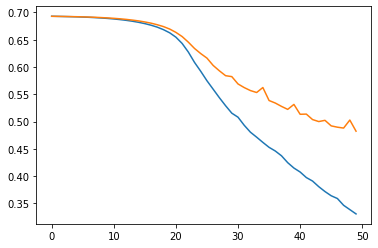

In [120]:
from matplotlib import pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend

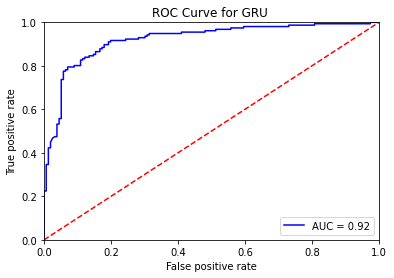

In [121]:
    predictions = model.predict(pad_test).ravel()
    fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(y_test, predictions)
    auc_keras = metrics.auc(fpr_keras, tpr_keras)
    
    plt.figure(1)
    plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve for GRU ')
    plt.show()

**GRU**

In [122]:
from tensorflow.keras.layers import Input,Dense,Embedding,GRU,GlobalMaxPool1D
from tensorflow.keras.models import Model

D=20
M=15


i= Input(shape=(T, ))
x=Embedding(v+1,D)(i)
x=GRU(M,return_sequences=True)(x)
x=GlobalMaxPool1D()(x)
x=Dense(32,activation='relu')(x)
x=Dense(1,activation='sigmoid')(x)
gru_model=Model(i,x)
gru_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 63)]              0         
                                                                 
 embedding_7 (Embedding)     (None, 63, 20)            36360     
                                                                 
 gru_2 (GRU)                 (None, 63, 15)            1665      
                                                                 
 global_max_pooling1d_7 (Glo  (None, 15)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_14 (Dense)            (None, 32)                512       
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                           

In [123]:
gru_model.compile(optimizer=tf.optimizers.Adam(learning_rate = 0.0001),loss='binary_crossentropy',metrics='accuracy')

r=gru_model.fit(pad_train,y_train,validation_data=(pad_test,y_test),epochs=50)

Epoch 1/50
23/23 [==============================] - 3s 52ms/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/50
23/23 [==============================] - 1s 32ms/step - loss: 0.6919 - accuracy: 0.5000 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 3/50
23/23 [==============================] - 1s 31ms/step - loss: 0.6911 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.5032
Epoch 4/50
23/23 [==============================] - 1s 31ms/step - loss: 0.6903 - accuracy: 0.5027 - val_loss: 0.6910 - val_accuracy: 0.5096
Epoch 5/50
23/23 [==============================] - 1s 32ms/step - loss: 0.6892 - accuracy: 0.5082 - val_loss: 0.6903 - val_accuracy: 0.5192
Epoch 6/50
23/23 [==============================] - 1s 32ms/step - loss: 0.6879 - accuracy: 0.5467 - val_loss: 0.6894 - val_accuracy: 0.5545
Epoch 7/50
23/23 [==============================] - 1s 30ms/step - loss: 0.6863 - accuracy: 0.6168 - val_loss: 0.6883 - val_accuracy: 0.5994
Epoch 8/50
23

In [124]:
loss,accuracy = gru_model.evaluate(pad_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

10/10 [==============================] - 0s 5ms/step - loss: 0.3451 - accuracy: 0.8494
loss: 0.3451188802719116
Accuracy: 0.8493589758872986


<function matplotlib.pyplot.legend>

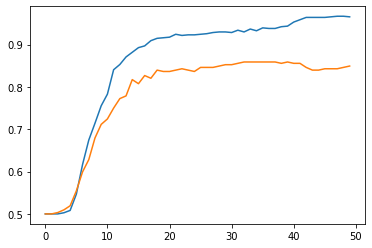

In [125]:
from matplotlib import pyplot as plt
plt.plot(r.history['accuracy'],label='loss')
plt.plot(r.history['val_accuracy'],label='val_loss')
plt.legend


**RNN**


In [126]:
from tensorflow.python.keras.layers.recurrent import SimpleRNN
from tensorflow.keras.layers import Input,Dense,Embedding,RNN,GlobalMaxPool1D
from tensorflow.keras.models import Model

D=20
M=15
#D=32
#M=5
##M=10 GIVIBG ACCURACY 84.545%
i= Input(shape=(T, ))
x=Embedding(v+1,D)(i)
x=SimpleRNN(M,return_sequences=True)(x)
x=GlobalMaxPool1D()(x)
x=Dense(32,activation='relu')(x)
x=Dense(1,activation='sigmoid')(x)
RNN=Model(i,x)
RNN.summary()

  <tf.Variable 'simple_rnn_2/simple_rnn_cell_2/recurrent_kernel:0' shape=(15, 15) dtype=float32>
  <tf.Variable 'simple_rnn_2/simple_rnn_cell_2/bias:0' shape=(15,) dtype=float32>. This is a strong indication that the Lambda layer should be rewritten as a subclassed Layer.
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 63)]         0           []                               
                                                                                                  
 embedding_8 (Embedding)        (None, 63, 20)       36360       ['input_9[0][0]']                
                                                                                                  
 tf.compat.v1.shape_4 (TFOpLamb  (3,)                0           ['embedding_8[0][0]']            
 da)             

In [127]:
RNN.compile(optimizer="Adam",loss='binary_crossentropy',metrics='accuracy')

r=RNN.fit(pad_train,y_train,validation_data=(pad_test,y_test),epochs=50)

Epoch 1/50
23/23 [==============================] - 2s 26ms/step - loss: 0.6935 - accuracy: 0.4918 - val_loss: 0.6901 - val_accuracy: 0.6058
Epoch 2/50
23/23 [==============================] - 0s 18ms/step - loss: 0.6785 - accuracy: 0.7212 - val_loss: 0.6842 - val_accuracy: 0.5609
Epoch 3/50
23/23 [==============================] - 0s 14ms/step - loss: 0.6544 - accuracy: 0.8269 - val_loss: 0.6734 - val_accuracy: 0.6827
Epoch 4/50
23/23 [==============================] - 0s 15ms/step - loss: 0.6136 - accuracy: 0.8832 - val_loss: 0.6533 - val_accuracy: 0.6859
Epoch 5/50
23/23 [==============================] - 0s 17ms/step - loss: 0.5499 - accuracy: 0.8997 - val_loss: 0.6205 - val_accuracy: 0.7051
Epoch 6/50
23/23 [==============================] - 0s 15ms/step - loss: 0.4630 - accuracy: 0.9203 - val_loss: 0.5831 - val_accuracy: 0.7083
Epoch 7/50
23/23 [==============================] - 0s 16ms/step - loss: 0.3742 - accuracy: 0.9245 - val_loss: 0.5556 - val_accuracy: 0.7308
Epoch 8/50
23

In [128]:
loss,accuracy = RNN.evaluate(pad_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

10/10 [==============================] - 0s 4ms/step - loss: 0.5154 - accuracy: 0.8013
loss: 0.5153571963310242
Accuracy: 0.8012820482254028


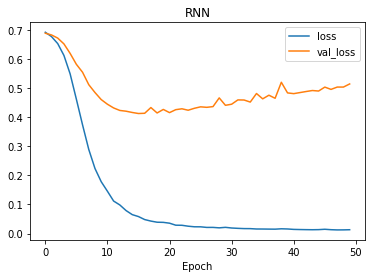

In [129]:
from matplotlib import pyplot as plt
plt.title('RNN')
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.legend()